# Analyzing Pond CO2 Emissions

In [1]:
#!pip install pandas --user

## Importing Packages

In [2]:
# importing modules and packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error 
from sklearn import preprocessing 
from statsmodels.stats.anova import anova_lm

## Reading Data

In [3]:
# imported data
# df = pd.read_csv('TotalData.csv') 
df = pd.read_csv('Pond1Data.csv') 
# df = pd.read_csv('Pond2Data.csv') 
# df = pd.read_csv('Pond3Data.csv') 
# df = pd.read_csv('Pond4Data.csv') 
df.rename(columns={'CO2(ppm)': 'CO2_ppm'}, inplace=True)
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

In [4]:
# check first 5 rows of data
df.head()

,DATE,PM2.5(ug/m3),PM10(ug/m3),PARTICLES(per/L),CO2_ppm,TEMPERATURE,HUMIDITY,TEMPUNIT,SENSOR
0,2025-03-30 20:31:00,13.9,21.9,2111,407,25.0,96.0,C,YELLOW
1,2025-03-30 20:41:00,10.0,16.3,1563,408,25.2,96.7,C,YELLOW
2,2025-03-30 20:51:00,10.1,15.9,1552,407,25.4,96.5,C,YELLOW
3,2025-03-30 21:01:00,10.3,17.1,1570,409,25.3,96.6,C,YELLOW
4,2025-03-30 21:11:00,7.0,12.3,1269,409,25.3,96.6,C,YELLOW


In [5]:
# check shape of data
df.shape

(206, 9)

In [6]:
# check for nulls
df.isnull().sum()

DATE                0
PM2.5(ug/m3)        0
PM10(ug/m3)         0
PARTICLES(per/L)    0
CO2_ppm             0
TEMPERATURE         0
HUMIDITY            0
TEMPUNIT            0
SENSOR              0
dtype: int64

In [7]:
# check data types
df.dtypes

DATE                datetime64[ns]
PM2.5(ug/m3)               float64
PM10(ug/m3)                float64
PARTICLES(per/L)             int64
CO2_ppm                      int64
TEMPERATURE                float64
HUMIDITY                   float64
TEMPUNIT                    object
SENSOR                      object
dtype: object

In [8]:
# get column names
df.columns

Index(['DATE', 'PM2.5(ug/m3)', 'PM10(ug/m3)', 'PARTICLES(per/L)', 'CO2_ppm',
       'TEMPERATURE', 'HUMIDITY', 'TEMPUNIT', 'SENSOR'],
      dtype='object')

In [9]:
# get basic stats
df.describe()

,DATE,PM2.5(ug/m3),PM10(ug/m3),PARTICLES(per/L),CO2_ppm,TEMPERATURE,HUMIDITY
count,206,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,2025-03-31 13:33:27.378640896,7.196602,11.515049,1134.805825,437.262136,27.833495,86.465534
min,2025-03-30 20:31:00,0.900000,1.300000,207.000000,401.000000,20.200000,40.800000
25%,2025-03-31 04:52:30,2.800000,4.400000,473.250000,406.000000,23.200000,82.675000
50%,2025-03-31 13:31:00,8.050000,12.800000,1261.000000,434.000000,24.900000,95.800000
75%,2025-03-31 22:10:30,9.900000,15.900000,1552.750000,455.750000,28.900000,97.600000
max,2025-04-01 06:41:00,17.200000,28.100000,2641.000000,550.000000,49.800000,99.900000
std,NaN,4.249561,6.920970,639.470170,36.033307,7.549576,16.971937


## Linear Regression

In [10]:
# create new data frame for analysis
dfA = df.drop(columns=['DATE', 'TEMPUNIT', 'SENSOR'])

In [11]:
# check first 5 rows
dfA.head()

,PM2.5(ug/m3),PM10(ug/m3),PARTICLES(per/L),CO2_ppm,TEMPERATURE,HUMIDITY
0,13.9,21.9,2111,407,25.0,96.0
1,10.0,16.3,1563,408,25.2,96.7
2,10.1,15.9,1552,407,25.4,96.5
3,10.3,17.1,1570,409,25.3,96.6
4,7.0,12.3,1269,409,25.3,96.6


In [12]:
# check new shape
dfA.shape

(206, 6)

In [13]:
# check for nulls
dfA.isnull().sum()

PM2.5(ug/m3)        0
PM10(ug/m3)         0
PARTICLES(per/L)    0
CO2_ppm             0
TEMPERATURE         0
HUMIDITY            0
dtype: int64

In [14]:
# select target value (y) and independent variables (x)
y = df['CO2_ppm']
x = df[['TEMPERATURE', 'HUMIDITY']]

In [15]:
# divide data for training/testing
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

In [16]:
# check shape
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((164, 2), (42, 2), (164,), (42,))

In [17]:
# check selected 5 rows of IVs
x_train.head()

,TEMPERATURE,HUMIDITY
1,25.2,96.7
130,40.6,56.4
134,32.8,70.1
7,25.1,97.4
90,30.2,77.8


In [18]:
# check same selected rows of target
y_train.head()

1      408
130    402
134    402
7      426
90     408
Name: CO2_ppm, dtype: int64

In [19]:
# perform linear regression
model = LinearRegression()

In [20]:
# fit x and y values together
model.fit(x_train,y_train)

LinearRegression()

In [21]:
# y-intercept
model.intercept_

np.float64(24.766056708538883)

In [22]:
# model coefficients (aka beta values) - written as [temperature, humidity]
model.coef_

array([4.67202033, 3.24334414])

In [23]:
# model is used to predict y_test data
y_pred = model.predict(x_test)

In [24]:
# predictions are listed
y_pred

array([435.2125245 , 443.15094715, 454.69214227, 454.83099797,
       455.76540204, 453.25193699, 456.57247949, 456.49528114,
       440.51767266, 440.19333825, 456.69980611, 409.23971458,
       410.4638658 , 438.85740141, 450.82318747, 447.10111221,
       453.89659391, 456.63814875, 425.73364005, 424.90350443,
       401.3825022 , 454.03946153, 453.89659391, 392.93878499,
       425.23936793, 455.3408111 , 456.35241352, 401.33638585,
       419.0890498 , 428.97698419, 455.84661231, 388.82670605,
       452.78473496, 451.70746328, 444.39465128, 395.38256886,
       455.29820001, 401.63715543, 456.49528114, 455.70374469,
       397.67997985, 459.5030183 ])

In [25]:
# variance between y_test and y_pred values are averaged
mean_absolute_error(y_test, y_pred)

23.42809999033371

In [26]:
# average percentage of variance from actual value. Meaning, (actual - predicted)/actual
mean_absolute_percentage_error(y_test, y_pred)

0.04940409918404522

In [27]:
# another error test, but all numbers are squared so larger variance has a more significant impact.
mean_squared_error(y_test, y_pred)

1084.324190459182

In [28]:
#R squared explains what percentage of the variance can be explained by the IVs. In this case, IVs only explain 31.25% of variance in data
model.score(x_test, y_test)

0.3125183540210049

In [29]:
# This cell determines which IV contributes more to accurate predictions. 2 Models are made using only one IV, and they are fitted to the actual values. Whichever model is more accurate is more 
# Model with Temperature only
X_temp = df[['TEMPERATURE']]
X_temp = sm.add_constant(X_temp)
model_temp = sm.OLS(y, X_temp).fit()

# Model with humidity only
X_hum = df[['HUMIDITY']]
X_hum = sm.add_constant(X_hum)
model_hum = sm.OLS(y, X_hum).fit()

# Full model with Temperature + Humidity
X_full = df[['TEMPERATURE', 'HUMIDITY']]
X_full = sm.add_constant(X_full)
model_full = sm.OLS(y, X_full).fit()

# Compare models using F-test
f_test = anova_lm(model_temp, model_hum, model_full)
print(f_test)

# output explanation:
# df_resid - degrees of freedom for residual, number of observations minus number of parameters.
# ssr - sum of squared residuals, measures total unexplained variability.
# df_diff - change in degrees of freedom, difference in df_resid between the two models.
# ss_diff - change in sum of squared residuals, difference in ssr between the two models.
# F - F-statistic, compares how much adding humidity improves the model.
# Pr(>F) - P-value for the F-test, determines probability that any improvements made by adding the second IV are due to chance. Here 0.79 indicates that there is no significant improvement.

   df_resid            ssr  df_diff       ss_diff          F   Pr(>F)
0     204.0  185901.800514      0.0           NaN        NaN      NaN
1     204.0  168172.193914     -0.0  17729.606599       -inf      NaN
2     203.0  158996.693239      1.0   9175.500675  11.714877  0.00075


In [30]:
# revise
results = smf.ols('CO2_ppm ~ TEMPERATURE + HUMIDITY', data=dfA).fit()
print(results.summary())
# Omnibus: evaluates whether residuals are normally distributed. If p-value is small, NOT normally distributed
# Jarque-Bera (JB): more specific than Omnibus, checks for asymmetry/skewness and tailedness/kurtosis. If p-value is small, NOT normal
# Durbin-Watson: checks for autocorreltation (correlation between residuals). 0-2 is positive autocorrelation, 2-4 is negative autocorrelation, 2 is no autocorrelation (ideal)
# Condition number: measures collinearity (correlation among predictors). Less than 30 is ideal.

                            OLS Regression Results                            
Dep. Variable:                CO2_ppm   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     68.42
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           1.94e-23
Time:                        20:40:31   Log-Likelihood:                -977.12
No. Observations:                 206   AIC:                             1960.
Df Residuals:                     203   BIC:                             1970.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      69.6946     75.531      0.923      

In [31]:
resultsH = smf.ols('CO2_ppm ~ HUMIDITY', data=dfA).fit()
print(resultsH.summary())
# Omnibus: evaluates whether residuals are normally distributed. If p-value is small, NOT normally distributed
# Jarque-Bera (JB): more specific than Omnibus, checks for asymmetry/skewness and tailedness/kurtosis. If p-value is small, NOT normal
# Durbin-Watson: checks for autocorreltation (correlation between residuals). 0-2 is positive autocorrelation, 2-4 is negative autocorrelation, 2 is no autocorrelation (ideal)
# Condition number: measures collinearity (correlation among predictors). Less than 30 is ideal.

                            OLS Regression Results                            
Dep. Variable:                CO2_ppm   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     118.9
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           4.17e-22
Time:                        20:40:31   Log-Likelihood:                -982.90
No. Observations:                 206   AIC:                             1970.
Df Residuals:                     204   BIC:                             1976.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    325.8719     10.410     31.303      0.0

In [32]:
resultsT = smf.ols('CO2_ppm ~ TEMPERATURE', data=dfA).fit()
print(resultsT.summary())

                            OLS Regression Results                            
Dep. Variable:                CO2_ppm   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     88.08
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           1.27e-17
Time:                        20:40:31   Log-Likelihood:                -993.23
No. Observations:                 206   AIC:                             1990.
Df Residuals:                     204   BIC:                             1997.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     510.2155      8.053     63.360      

## Graphing

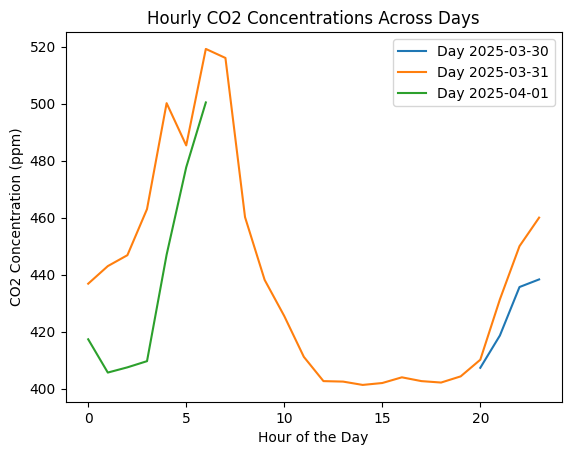

In [33]:
# create new data frame for graphing
dfG = df.drop(columns=['PM2.5(ug/m3)', 'PM10(ug/m3)', 'PARTICLES(per/L)', 'TEMPERATURE', 'HUMIDITY', 'TEMPUNIT', 'SENSOR'])
# format DATE column
dfG['DATE'] = pd.to_datetime(dfG['DATE'])
# Extract the date (e.g., 01/01/2025)
df['DAY'] = df['DATE'].dt.date  
# Extract the hour (0, 1, ..., 23)
df['HOUR'] = df['DATE'].dt.hour  
# Create a pivot table where rows are days and columns are hours
co2_pivot = df.pivot_table(index='DAY', columns='HOUR', values='CO2_ppm', aggfunc='mean')

# Plot CO2 concentration for each day
for day, co2_values in co2_pivot.iterrows():
    co2_values.plot(label=f"Day {day}")

# Add labels, title, and legend
plt.xlabel("Hour of the Day")
plt.ylabel("CO2 Concentration (ppm)")
plt.title("Hourly CO2 Concentrations Across Days")
plt.legend(loc="best")
plt.show()

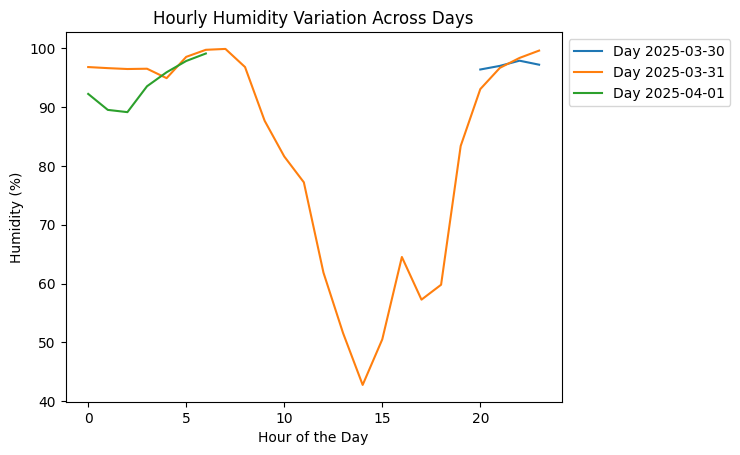

In [34]:
# Create a pivot table for Humidity
humidity_pivot = df.pivot_table(index='DAY', columns='HOUR', values='HUMIDITY', aggfunc='mean')

# Plot Humidity for each day
for day, humidity_values in humidity_pivot.iterrows():
    humidity_values.plot(label=f"Day {day}")

# Add labels, title, and legend
plt.xlabel("Hour of the Day")
plt.ylabel("Humidity (%)")
plt.title("Hourly Humidity Variation Across Days")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

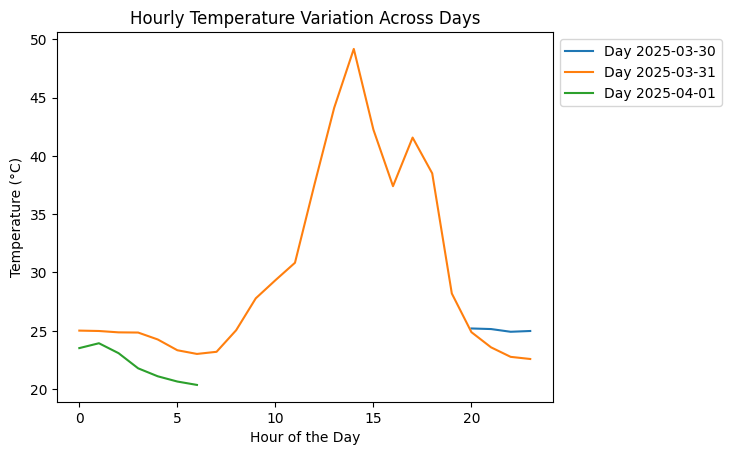

In [35]:
# Create a pivot table for Temperature
temperature_pivot = df.pivot_table(index='DAY', columns='HOUR', values='TEMPERATURE', aggfunc='mean')

# Plot Temperature for each day
for day, temperature_values in temperature_pivot.iterrows():
    temperature_values.plot(label=f"Day {day}")

# Add labels, title, and legend
plt.xlabel("Hour of the Day")
plt.ylabel("Temperature (°C)")
plt.title("Hourly Temperature Variation Across Days")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

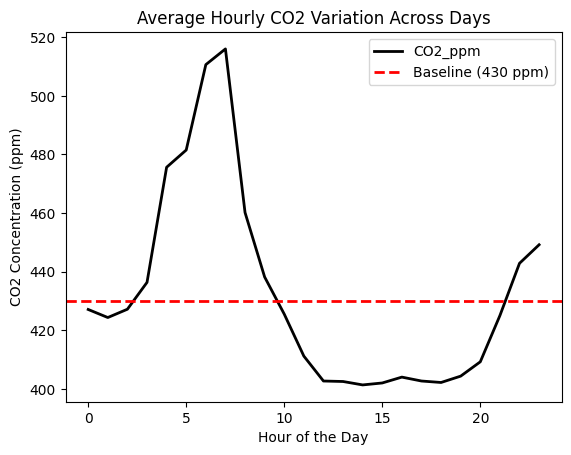

In [36]:
import matplotlib.pyplot as plt

# Compute the average CO2 concentration per hour
avg_co2_per_hour = df.pivot_table(index=df['DATE'].dt.hour, values='CO2_ppm', aggfunc='mean')

# Plot the averaged CO2 data
avg_co2_per_hour.plot(label="Average CO2 Variation", color='black', linewidth=2)

# Add baseline at 430 ppm
plt.axhline(y=430, color='red', linestyle='dashed', linewidth=2, label="Baseline (430 ppm)")

# Add labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("CO2 Concentration (ppm)")
plt.title("Average Hourly CO2 Variation Across Days")
plt.legend(loc="best")

# Show the plot
plt.show()

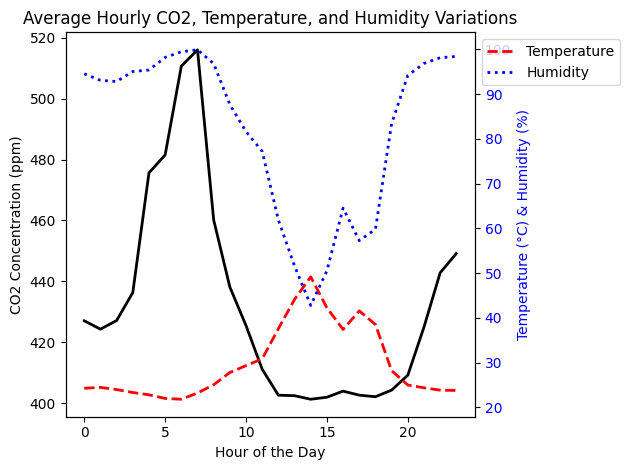

In [37]:
# Compute the average value per hour across all days for each variable
avg_co2_per_hour = df.pivot_table(index=df['DATE'].dt.hour, values='CO2_ppm', aggfunc='mean')
avg_temp_per_hour = df.pivot_table(index=df['DATE'].dt.hour, values='TEMPERATURE', aggfunc='mean')
avg_humidity_per_hour = df.pivot_table(index=df['DATE'].dt.hour, values='HUMIDITY', aggfunc='mean')

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot CO2 concentration
ax1.plot(avg_co2_per_hour, label="CO2 Concentration", color='black', linewidth=2)
ax1.set_xlabel("Hour of the Day")
ax1.set_ylabel("CO2 Concentration (ppm)", color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create secondary y-axis for Temperature and Humidity
ax2 = ax1.twinx()
ax2.plot(avg_temp_per_hour, label="Temperature", color='red', linestyle="dashed", linewidth=2)
ax2.plot(avg_humidity_per_hour, label="Humidity", color='blue', linestyle="dotted", linewidth=2)
ax2.set_ylabel("Temperature (°C) & Humidity (%)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Combine legend entries from both axes
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add title and layout adjustments
plt.title("Average Hourly CO2, Temperature, and Humidity Variations")
plt.tight_layout()  # Adjusts layout to fit legend and labels properly

# Show the plot
plt.show()